# Tutorial 1
## Exercise 6

In [12]:
from statistics import mean
from pprint import pprint
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
#matplotlib.use('TkAgg')

In [2]:
def show_normals(means_1, means_2):
    x = np.linspace(-10, 10, 500)

    plt.figure(figsize=(10, 6))
    for i, (mu1, mu2) in enumerate(zip(means_1, means_2)):
        y1 = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * (x - mu1)**2)
        y2 = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * (x - mu2)**2)

        plt.subplot(1, 10, i + 1)
        plt.plot(y1, x, label=f'μ1={mu1:.1f}')
        plt.plot(y2, x, label=f'μ2={mu2:.1f}', linestyle='--')
        plt.xticks([])
        plt.yticks([])
        plt.gca().invert_xaxis()
        plt.tight_layout()

    plt.show()


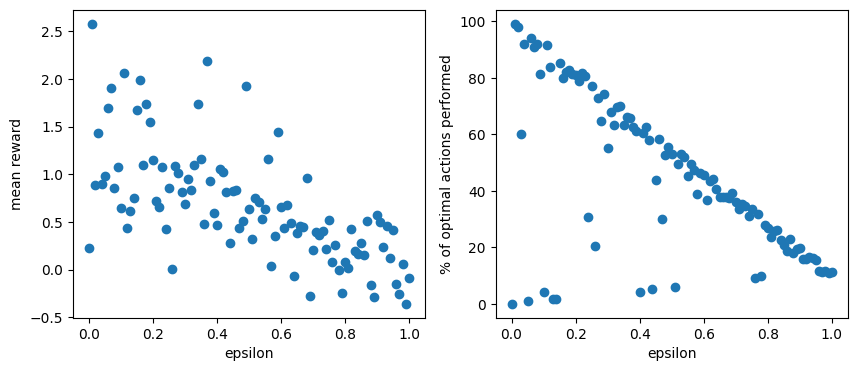

In [3]:


def play(i, Q):
    return np.random.normal(Q[i], 1, 1)[0]

def show_normals(means_1, means_2):
    x = np.linspace(-10, 10, 500)

    plt.figure(figsize=(10, 6))
    for i, (mu1, mu2) in enumerate(zip(means_1, means_2)):
        y1 = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * (x - mu1)**2)
        y2 = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * (x - mu2)**2)

        plt.subplot(1, 10, i + 1)
        plt.plot(y1, x, label=f'μ1={mu1:.1f}')
        plt.plot(y2, x, label=f'μ2={mu2:.1f}', linestyle='--')
        plt.xticks([])
        plt.yticks([])
        plt.gca().invert_xaxis()
        plt.tight_layout()

    plt.show()



# apply a single episode of Algorithm 1
def episode(e, show=False):
    k = 10 # number of arms
    Q = np.random.normal(0, 1, k)  # True value of each arm
    optimal_a = np.argmax(Q)

    # Agent data
    n = np.zeros(k)  # number of executions per action
    q = np.zeros(k)  # estimated gain per action
    R = []  # all received rewards

    T = 1000  # number of time steps
    for i in range(T):
        # do we explore or exploit?
        if e > np.random.uniform():
            # explore
            # pick a random action from 1 to k
            a = np.random.choice(range(k))
        else:
            # exploit
            # perform the action with the highest estimated return
            a = np.argmax(q)
        # perform the action and get a reward
        r = play(a, Q)
        # save the reward for statistics later
        R.append(r)
        # update the reward estimation for the chosen action
        q[a] = q[a] + (r - q[a]) / (n[a] if n[a] else 1)
        # increase its play-counter
        n[a] += 1

    # compute the average reward
    mean_reward = mean(R)
    # compute the percentage of optimal actions taken
    perc_optimal_a_picks = n[optimal_a] / T * 100
    # visualize the actual means and the estimated means
    if show: show_normals(Q, q)
    return mean_reward, perc_optimal_a_picks


mean_rewards = []
percentages_optimal_a_picks = []
# get "all" possible epsilon values between 0 and 1
step=0.01
epsilons = np.arange(0, 1+step, step)
for e in epsilons:
    mr, pop = episode(e)
    mean_rewards.append(mr)
    percentages_optimal_a_picks.append(pop)

# visualize the results
# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

ax1.scatter(epsilons, mean_rewards)
ax1.set_xlabel("epsilon")
ax1.set_ylabel("mean reward")

ax2.scatter(epsilons, percentages_optimal_a_picks)
ax2.set_xlabel("epsilon")
ax2.set_ylabel("% of optimal actions performed")

plt.show()





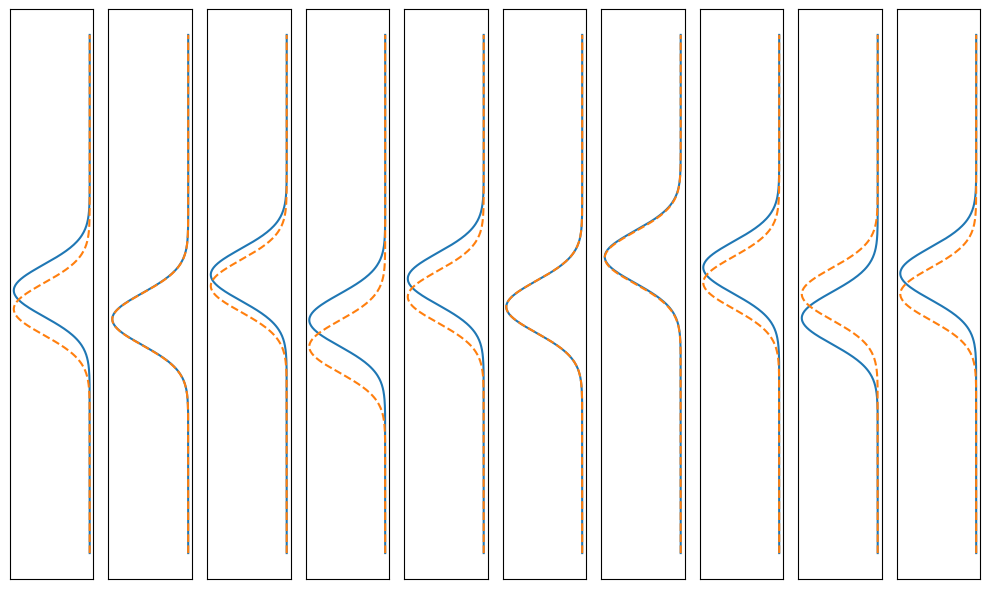

(1.373854061597068, 98.1)

In [4]:
episode(.01, show=True)


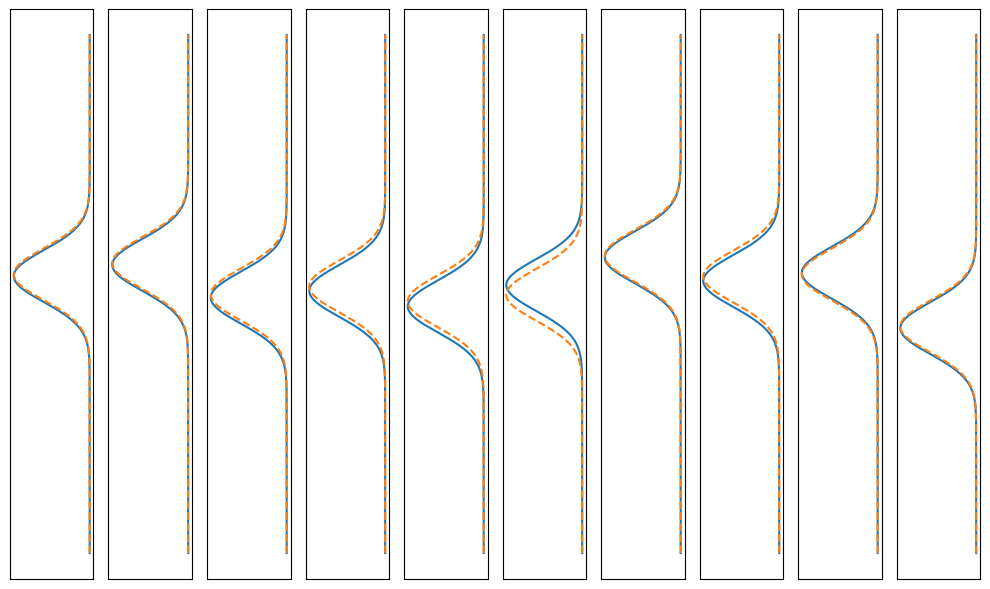

(1.268243429150045, 83.6)

In [5]:
episode(.2, show=True)


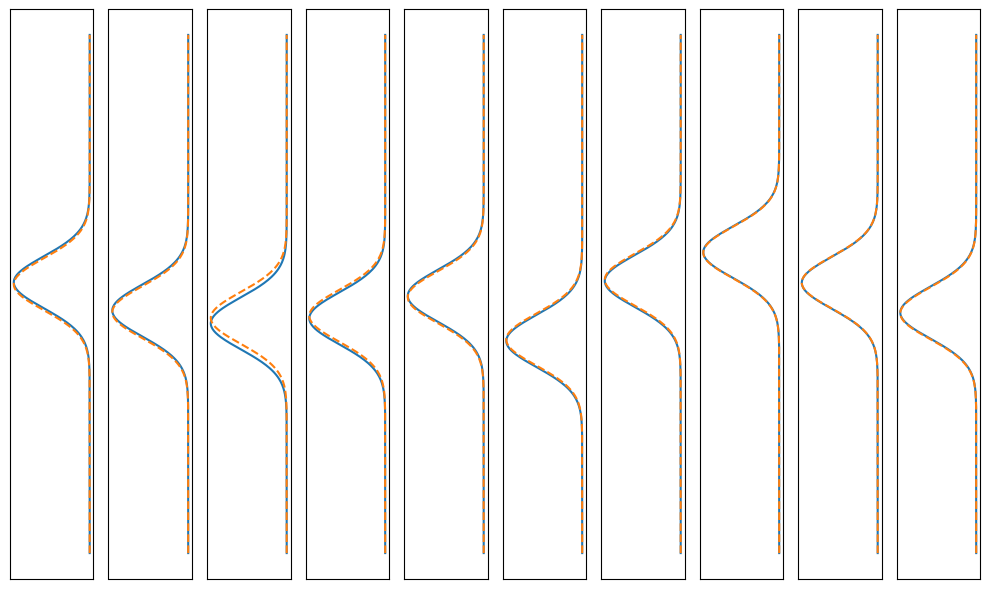

(-0.02287480891917192, 18.7)

In [6]:
episode(.9, show=True)


## Exercise 7

/var/folders/0y/2g55yd4s4_74pt7xwt55r0y40000gn/T/ipykernel_51652/1812014938.py:7: RuntimeWarning: divide by zero encountered in log
  return reward_estimate + c * np.sqrt(np.log(t) / num_executions)
/var/folders/0y/2g55yd4s4_74pt7xwt55r0y40000gn/T/ipykernel_51652/1812014938.py:7: RuntimeWarning: invalid value encountered in sqrt
  return reward_estimate + c * np.sqrt(np.log(t) / num_executions)


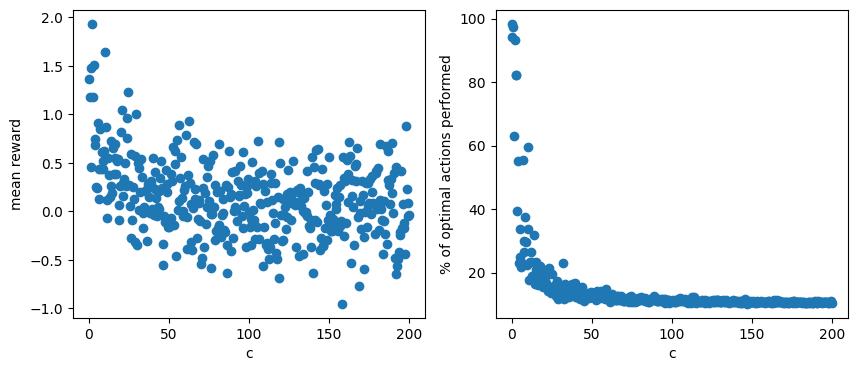

In [7]:


def play(i, Q):
    return np.random.normal(Q[i], 1, 1)[0]


def upper_confidence_estimation(reward_estimate, num_executions, t, c):
    if not num_executions: num_executions = 1
    return reward_estimate + c * np.sqrt(np.log(t) / num_executions)


# apply a single episode
def episode(c, show=False):
    k = 10 # number of arms
    Q = np.random.normal(0, 1, k)  # True value of each arm
    optimal_a = np.argmax(Q)

    # Agent data
    n = np.zeros(k)  # number of executions per action
    q = np.zeros(k)  # estimated gain per action
    R = []  # all received rewards

    T = 1000  # number of time steps
    for i in range(T):
        # pick an action using the upper-confidence-bound formula
        confidences = [upper_confidence_estimation(q[a], n[a], i, c) for a in range(k)]
        a = np.argmax(confidences)

        # perform the action and get a reward
        r = play(a, Q)
        # save the reward for statistics later
        R.append(r)
        # update the reward estimation for the chosen action
        q[a] = q[a] + (r - q[a]) / (n[a] if n[a] else 1)
        # increase its play-counter
        n[a] += 1

    # compute the average reward
    mean_reward = mean(R)
    if show: show_normals(Q, q)

    # compute the percentage of optimal actions taken
    perc_optimal_a_picks = n[optimal_a] / T * 100
    return mean_reward, perc_optimal_a_picks


mean_rewards = []
percentages_optimal_a_picks = []
# get "all" possible values for c
step=0.5
uncertainties = np.arange(0, 200+step, step)
for c in uncertainties:
    mr, pop = episode(c)
    mean_rewards.append(mr)
    percentages_optimal_a_picks.append(pop)

# visualize the results
# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

ax1.scatter(uncertainties, mean_rewards)
ax1.set_xlabel("c")
ax1.set_ylabel("mean reward")

ax2.scatter(uncertainties, percentages_optimal_a_picks)
ax2.set_xlabel("c")
ax2.set_ylabel("% of optimal actions performed")

plt.show()

/var/folders/0y/2g55yd4s4_74pt7xwt55r0y40000gn/T/ipykernel_51652/1812014938.py:7: RuntimeWarning: divide by zero encountered in log
  return reward_estimate + c * np.sqrt(np.log(t) / num_executions)
/var/folders/0y/2g55yd4s4_74pt7xwt55r0y40000gn/T/ipykernel_51652/1812014938.py:7: RuntimeWarning: invalid value encountered in sqrt
  return reward_estimate + c * np.sqrt(np.log(t) / num_executions)


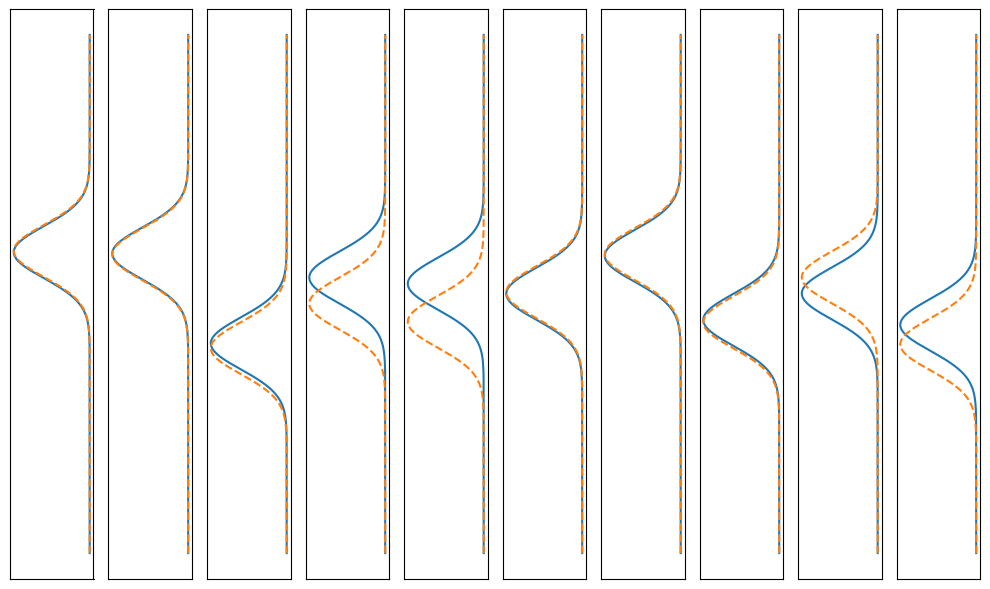

(1.5791316853200892, 56.699999999999996)

In [8]:
episode(1, show=True)


/var/folders/0y/2g55yd4s4_74pt7xwt55r0y40000gn/T/ipykernel_51652/1812014938.py:7: RuntimeWarning: divide by zero encountered in log
  return reward_estimate + c * np.sqrt(np.log(t) / num_executions)
/var/folders/0y/2g55yd4s4_74pt7xwt55r0y40000gn/T/ipykernel_51652/1812014938.py:7: RuntimeWarning: invalid value encountered in sqrt
  return reward_estimate + c * np.sqrt(np.log(t) / num_executions)


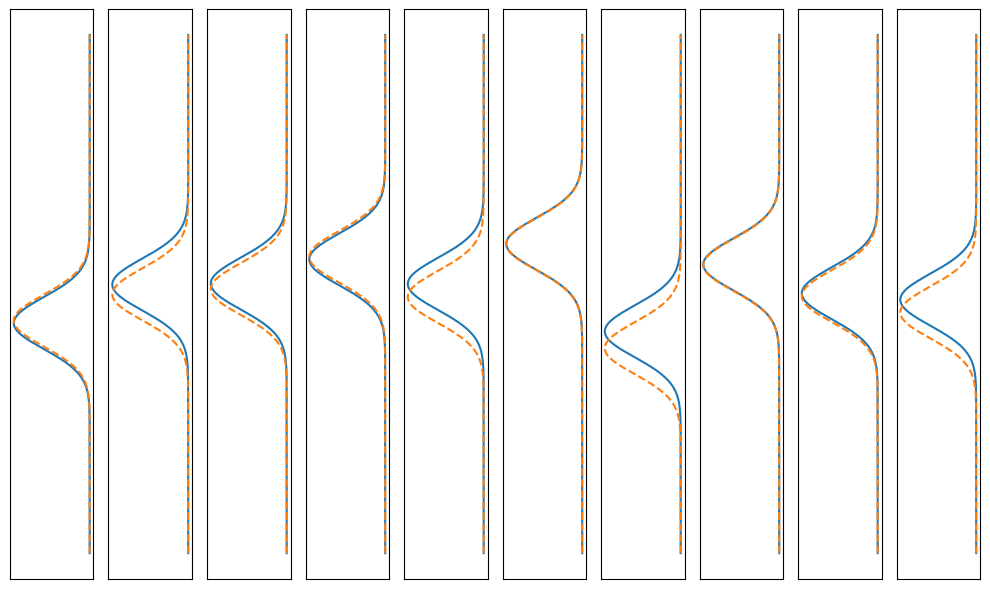

(1.5488457757926877, 66.8)

In [9]:
episode(4, show=True)


/var/folders/0y/2g55yd4s4_74pt7xwt55r0y40000gn/T/ipykernel_51652/1812014938.py:7: RuntimeWarning: divide by zero encountered in log
  return reward_estimate + c * np.sqrt(np.log(t) / num_executions)
/var/folders/0y/2g55yd4s4_74pt7xwt55r0y40000gn/T/ipykernel_51652/1812014938.py:7: RuntimeWarning: invalid value encountered in sqrt
  return reward_estimate + c * np.sqrt(np.log(t) / num_executions)


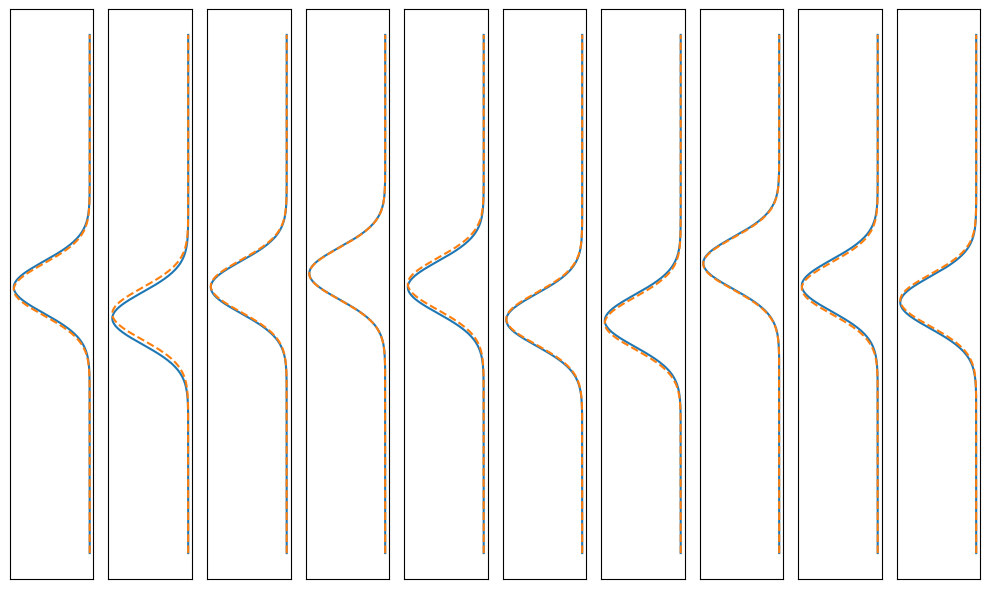

(0.09374579399160313, 12.5)

In [10]:
episode(40, show=True)


## Exercise 8

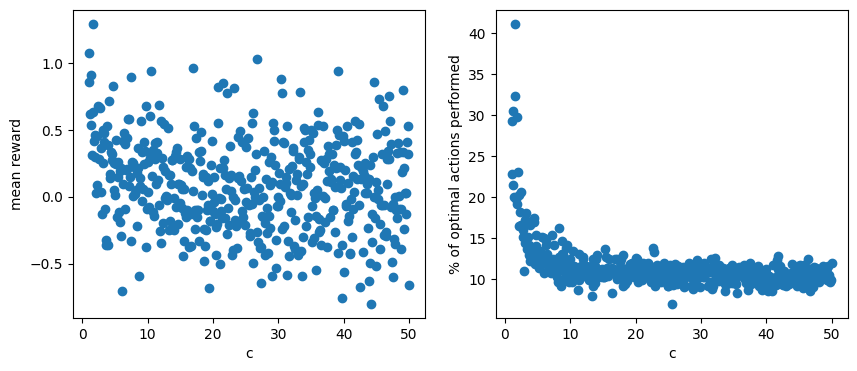

In [13]:

def play(i, Q):
    return np.random.normal(Q[i], 1, 1)[0]

# apply a single episode
def episode(temp, show=False):
    k = 10 # number of arms
    Q = np.random.normal(0, 1, k)  # True value of each arm
    optimal_a = np.argmax(Q)

    # Agent data
    n = np.zeros(k)  # number of executions per action
    q = np.ones(k)  # estimated gain per action
    R = []  # all received rewards

    T = 1000  # number of time steps
    for i in range(T):
        # pick an action using the Boltzmann-distribution of reward estimates
        q_discounted = [np.exp(qa / temp) for qa in q]
        sum_q_discounted = sum(q_discounted)
        weights = [q_d/sum_q_discounted for q_d in q_discounted]
        a = random.choices(np.arange(k), weights=weights)

        # perform the action and get a reward
        r = play(a, Q)
        # save the reward for statistics later
        R.append(r)
        # update the reward estimation for the chosen action
        q[a] = q[a] + (r - q[a]) / (n[a] if n[a] else 1)
        # increase its play-counter
        n[a] += 1

    # compute the average reward
    mean_reward = mean(R)
    if show: show_normals(Q, q)
    # compute the percentage of optimal actions taken
    perc_optimal_a_picks = n[optimal_a] / T * 100
    return mean_reward, perc_optimal_a_picks


mean_rewards = []
percentages_optimal_a_picks = []
# get "all" possible values for c
step=0.1
temps = np.arange(1, 50+step, step)
for temp in temps:
    mr, pop = episode(temp)
    mean_rewards.append(mr)
    percentages_optimal_a_picks.append(pop)

# visualize the results
# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

ax1.scatter(temps, mean_rewards)
ax1.set_xlabel("c")
ax1.set_ylabel("mean reward")

ax2.scatter(temps, percentages_optimal_a_picks)
ax2.set_xlabel("c")
ax2.set_ylabel("% of optimal actions performed")

plt.show()

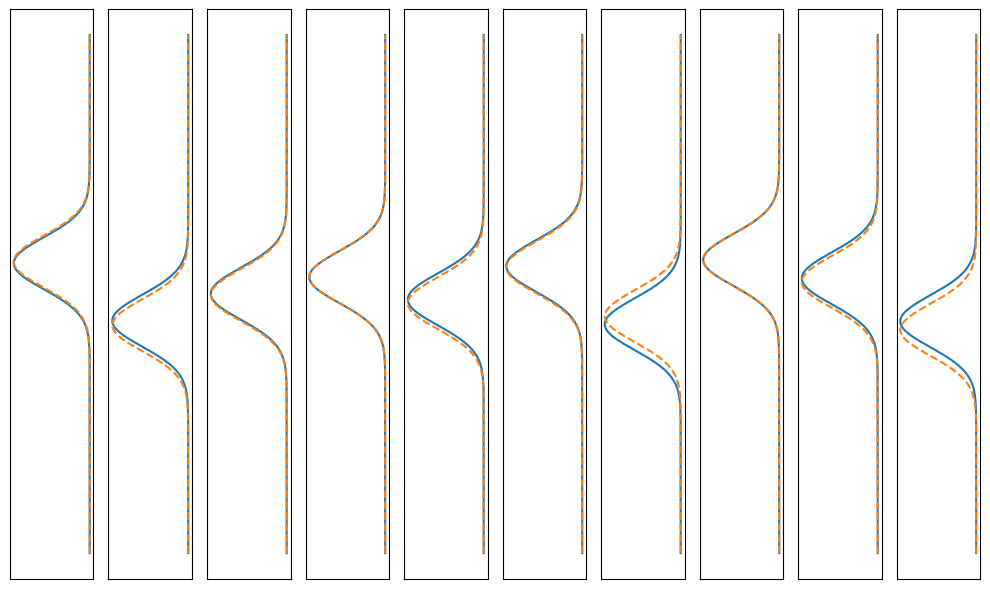

(0.7530336041222064, 22.6)

In [14]:
episode(1, show=True)


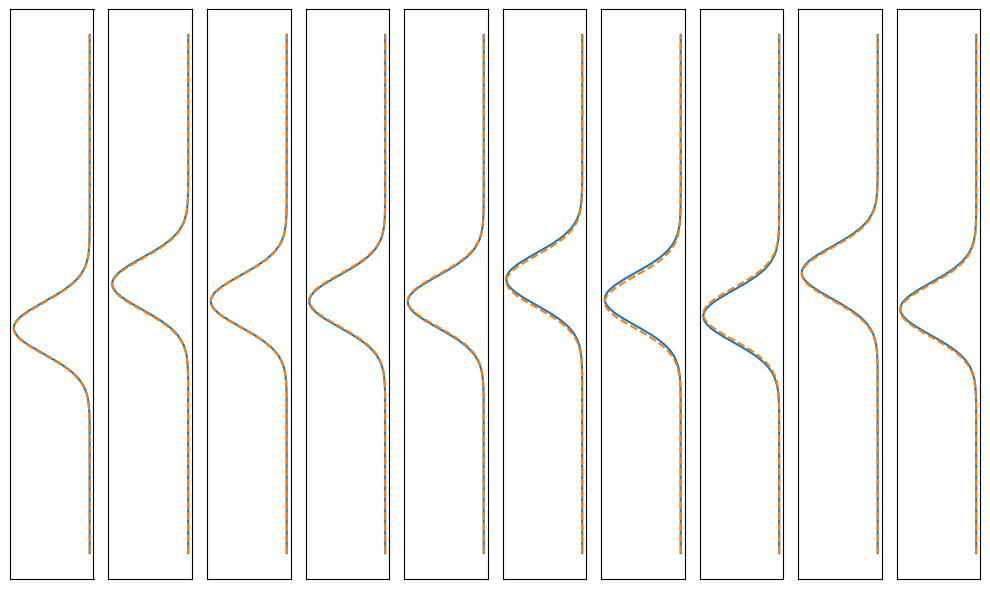

(-0.11118346158808351, 14.2)

In [15]:
episode(4, show=True)


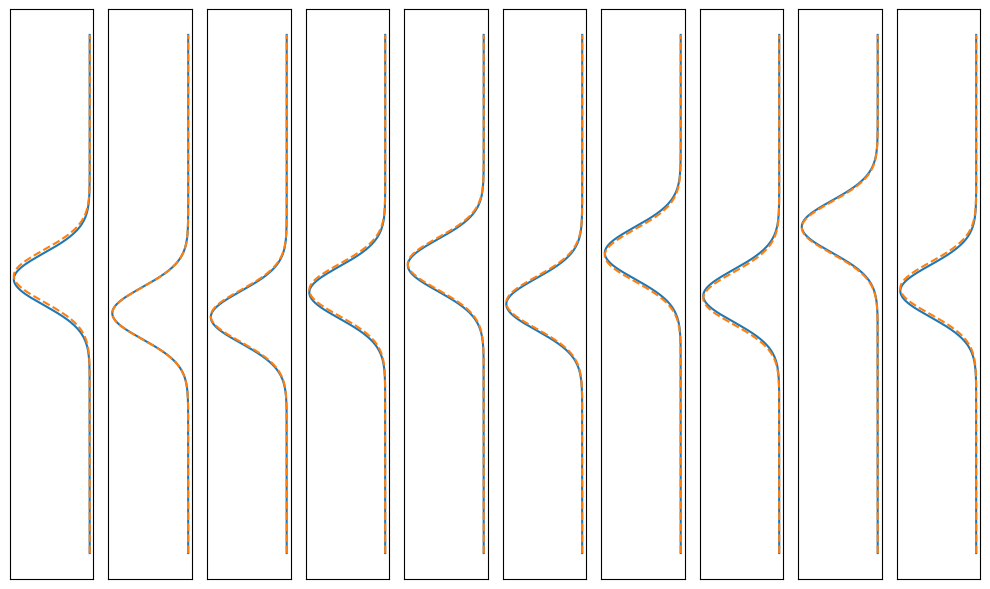

(0.4291568558507895, 10.5)

In [16]:
episode(40, show=True)


## Exercise 9

In [17]:

R=[0, 1, -1, 2, -1, 2, 0, 0, 0]
T=5
gamma = 0.5

def get_G(r, t):
    return sum([r * gamma ** (k - t - 1) for k in range(t+1, T+1)])


print([get_G(R[t+1], t) for t in range(T+1)])







R=[0, -1, 2] + [1]*1000
T=1000
gamma = 0.9

def get_G(r, t):
    return sum([r * gamma ** (k - t - 1) for k in range(t+1, T+1)])


print([get_G(R[t+1], t) for t in range(4)])

[1.9375, -1.875, 3.5, -1.5, 2.0, 0]
[-9.999999999999993, 19.999999999999986, 9.999999999999993, 9.999999999999993]
